In [63]:
from gradient_descent import gradient_descent
from one_dimensional import dichotomy_method, fibonacci_method, golden_ratio_method
import matplotlib.pyplot as plt
import numpy as np

In [55]:
def draw_plot(xs, ys, xlabel, ylabel, title):
    plt.plot(xs, ys)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [58]:
# doesn't work on the complicated function
# OverflowError: (34, 'Result too large')
f = lambda x: 3 * x**12 + (x - 12)**7 + (x - 37)**3 - (x + 32)**2 + 7
f_grad = lambda x: 36 * x**11 + 7 * (x - 12)**6 + 3 * (x - 37)**2 - 2 * (x + 32)

# doesn't work with this also
f = lambda x: -2 * x**2 + 4 * x
f_grad = lambda x: -4 * x + 4

f = lambda x: (x - 3) ** 2 + 8
f_grad = lambda x: 2 * (x - 3)
    
start_arg = 3
methods = [dichotomy_method, fibonacci_method, golden_ratio_method]
iteration_amount = []

In [59]:
for method in methods:
    res = gradient_descent(f, f_grad, start_arg, method)
    print(f'method: {method.__name__}', f'result: {res[-1]}', f'iterations: {len(res)}')
    iteration_amount.append(len(res))

method: dichotomy_method result: 3.0 iterations: 2
method: fibonacci_method result: 3.0 iterations: 2
method: golden_ratio_method result: 3.0 iterations: 2


In [161]:
def make_level_lines_plot(f, f_grad, start, method, x_min, x_max, y_min, y_max, x_step=0.1, y_step=0.1, levels=None):
    trace = gradient_descent(f, f_grad, start, method, eps=1e-8)
    print(f'result: {trace[-1]}', f'iterations: {len(trace)}')
    if levels is None:
        levels = [f(args) for args in trace]
        list.sort(levels)
    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[f(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    plt.clabel(cs)
    for i in range(len(trace) - 1):
        cur_point = trace[i]
        next_point = trace[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

In [162]:
sum_squares_f = lambda args: np.sum(args ** 2)
sum_squares_grad = lambda args: 2 * args

result: [7.58401309e-24 7.58401309e-24] iterations: 4


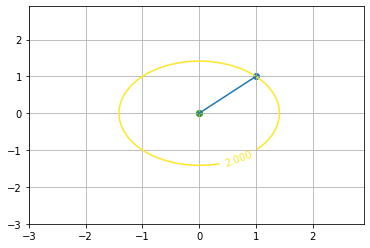

In [171]:
make_level_lines_plot(sum_squares_f,
              sum_squares_grad,
              start=np.array([1, 1]),
              method=golden_ratio_method,
              x_min=-3,
              x_max=3,
              y_min=-3,
              y_max=3
             )

In [172]:
def some_f(arg):
    x = arg[0]
    y = arg[1]
    return (x - 2) ** 2 + (y - 1) ** 2

def some_f_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (x - 2)
    dy = 2 * (y - 1)
    return np.array([dx, dy])

result: [2. 1.] iterations: 4


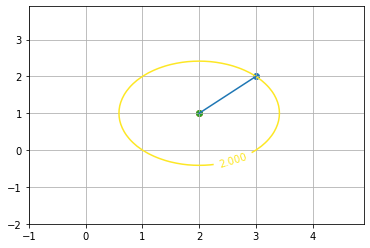

In [173]:
make_level_lines_plot(some_f,
              some_f_grad,
              start=np.array([3, 2]),
              method=golden_ratio_method,
              x_min=-1,
              x_max=5,
              y_min=-2,
              y_max=4
             )